# 보스턴 집값 예측

## 0 환경 준비

In [ ]:
# 필요한 라이브러리(모듈) 임포트

# keras.models라는 라이브러리에서 Sequentiaㅣ()함수를 불러오라는 의미
from keras.models import Sequential
from keras.layers import Dense

# pandas라이브러리를 pd라는 짧은 이름으로 불러오라는 의미
import pandas as pd

## 1 데이터 준비

In [ ]:
# boston.csv파일을 데이터프레임으로 읽기
# df에 대입

df = pd.read_csv('/content/drive/MyDrive/ChangProgram/data/boston.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 앞쪽 5개의 데이터 보기

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
# 행, 열 확인

df.shape

(506, 14)

In [ ]:
# 요약정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


* 독립변수(원인변수)와 종속변수(결과변수) 설정

In [ ]:
# 독립변수를 X에 대입

X = df.iloc[:, 0:13]
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [ ]:
# 종속변수를 Y에 대입

Y = df.iloc[:, [13]]
Y

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


## 2 모델구조 만들기

In [ ]:
# 레이어를 나란이 연결하기 위해 케라스의 Sequential 모델을 만듦
# model에 대입

model = Sequential()

In [ ]:
# 독립변수가 13개, 노드가 30개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(30, input_dim=13, activation='relu'))

In [ ]:
# 노드가 6개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(6, activation='relu'))

In [ ]:
# 종속변수 1개를 설정하여 하나의 Dense레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(1))

In [ ]:
# 모델 컴파일
# 위에서 만든 모델이 효과적으로 구현될 수 있게 여러가지 옵션을 설정해서 컴파일함
# 손실함수는 최적의 가중치를 학습하기 위해 필수적인 부분
# 손실함수를 평균제곱오차(실제값과 예측값의 차이의 제곱에 제곱근을 구함)로
# 옵티마이저를 'adam'으로 설정하여 모델을 컴파일 함

model.compile(loss='mean_squared_error', optimizer='adam')

## 3 모델 학습시키기

In [ ]:
# 독립변수와 종속변수, 학습회수(epochs)를 설정해서 모델을 학습시킴

model.fit(X, Y, epochs=50, verbose=1)

Epoch 1/50
16/16 [==============================] - 0s 4ms/step - loss: 56.8833
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 56.2280
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 55.5986
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 55.4826
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 53.9574
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 53.4459
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 53.3038
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 52.7885
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 52.5389
Epoch 10/50
16/16 [==============================] - 0s 4ms/step - loss: 50.4275
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 49.9321
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 49.2143
Epoch 13/50
16/16 [==================

## 4 모델을 이용하여 예측하기

In [ ]:
# 학습된 model을 이용하여 예측하기
# X의 10개의 데이터를 주면서 예측해보기

model.predict(X.iloc[:10])

array([[27.47042 ],
       [27.726208],
       [28.839437],
       [31.81134 ],
       [31.62137 ],
       [31.350672],
       [22.70535 ],
       [18.58444 ],
       [13.01454 ],
       [18.781746]], dtype=float32)

In [ ]:
# Y의 10개의 실제 데이터 확인하기

Y.iloc[:10]

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


# 아이리스 품종 분류

## 0 환경 준비

In [ ]:
# 필요한 라이브러리(모듈) 임포트

# keras.models라는 라이브러리에서 Sequentiaㅣ()함수를 불러오라는 의미
from keras.models import Sequential
from keras.layers import Dense

# pandas라이브러리를 pd라는 짧은 이름으로 불러오라는 의미
import pandas as pd

## 1 데이터 준비

In [ ]:
# iris.csv파일을 데이터프레임으로 읽기
# df에 대입

df = pd.read_csv('/content/drive/MyDrive/ChangProgram/data/iris.csv')

In [ ]:
# 앞쪽 5개의 데이터 보기

df.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 행, 열 확인

df.shape

(150, 5)

In [ ]:
# 품종의 고유데이터 종류와 개수 알아보기

df['품종'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: 품종, dtype: int64

In [ ]:
# 요약정보 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   꽃잎길이    150 non-null    float64
 1   꽃잎폭     150 non-null    float64
 2   꽃받침길이   150 non-null    float64
 3   꽃받침폭    150 non-null    float64
 4   품종      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* 원핫인코딩
    - 신경망과 일부 머신 러닝 알고리즘은 숫자만 입력받을 수 있어서 범주형 변수를 바로 사용할 수 없다. 따라서 범주형 변수를 머신 러닝에 사용하려면 반드시 전처리를 거쳐야 한다.
    - <u>범주형 변수를 숫자형 변수로 바꾸는 방법으로 원핫 인코딩(one-hot encoding)을 사용</u>할 수 있다. 
    - <u>판다스는 원핫 인코딩을 get_dummies()메소드</u>로 구현해 제공한다. 예를 들어 N개의 범주 값을 담은 범주형 변수를 원핫 인코딩을 사용해 변환하면, 이진 변수 N개를 얻을 수 있다.

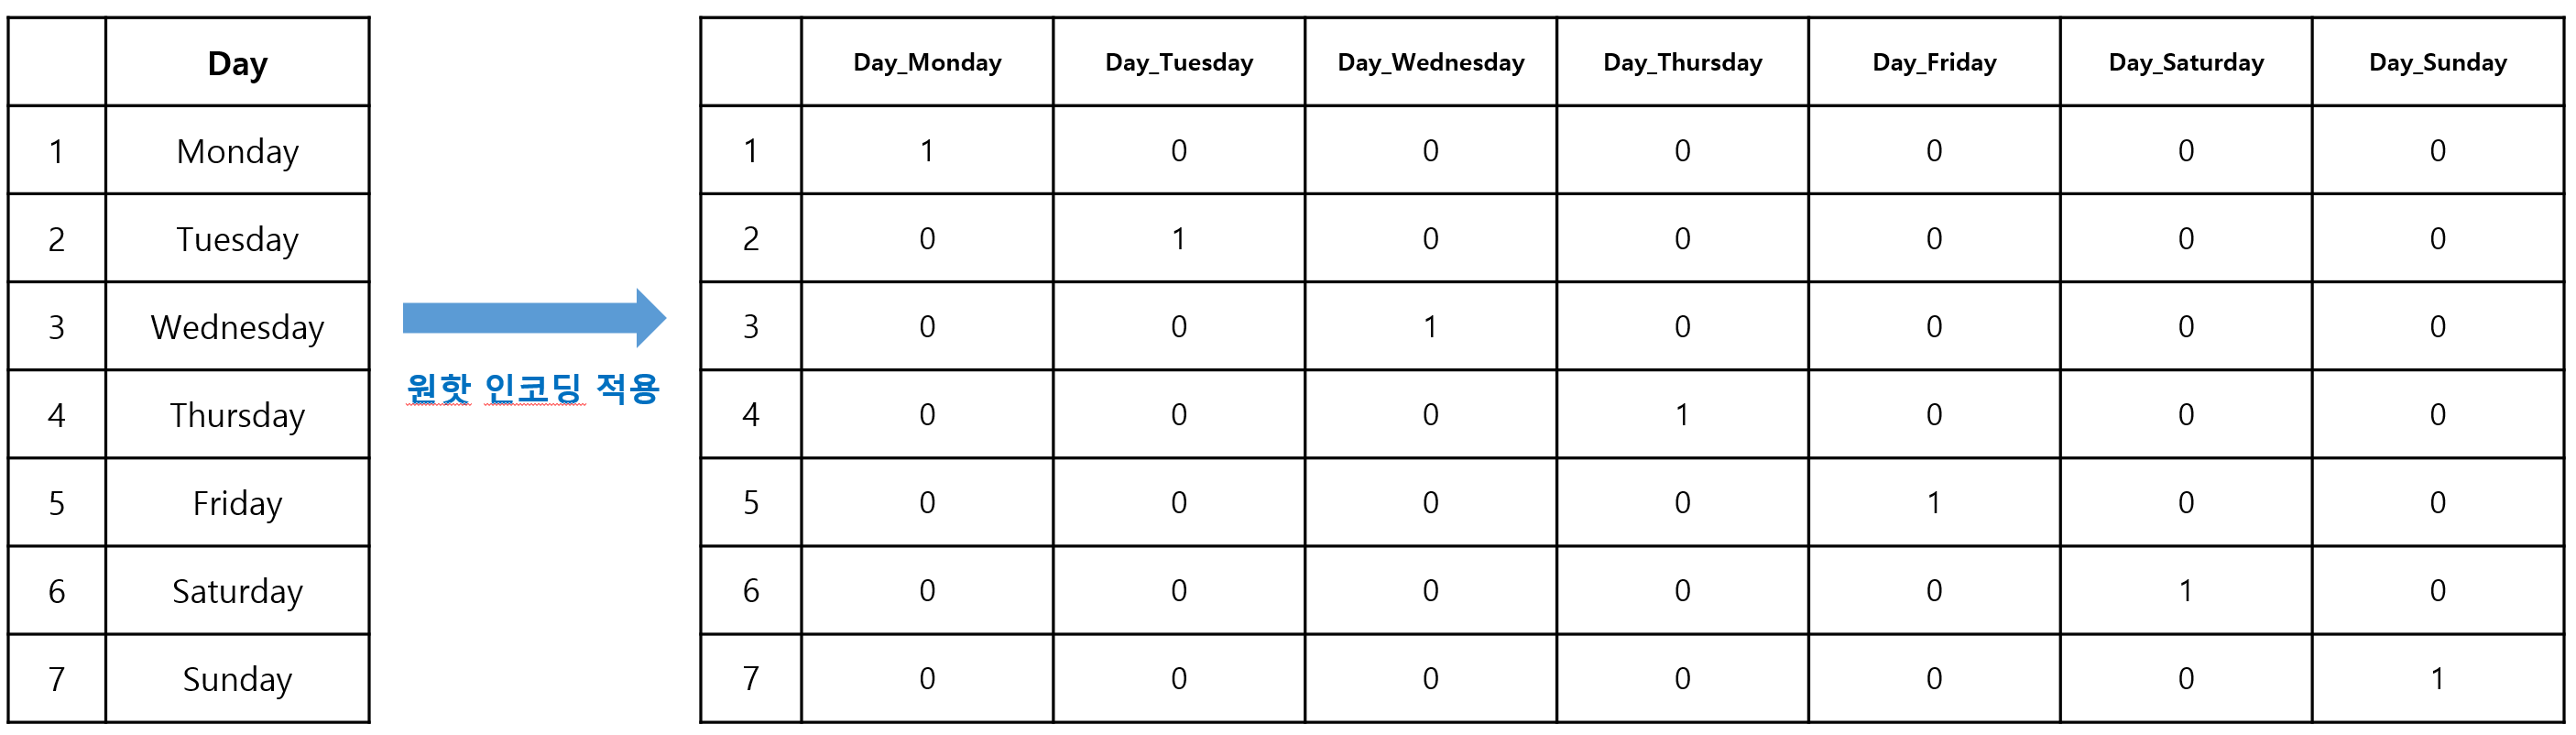

In [ ]:
# 판다스의 get_dummies 메소드를 이용하여 원핫인코딩한다.

df = pd.get_dummies(df)
df.head()

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭,품종_setosa,품종_versicolor,품종_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


* 독립변수(원인변수)와 종속변수(결과변수) 설정

In [ ]:
# 독립변수를 X에 대입

X = df.iloc[:, :4]
X

,꽃잎길이,꽃잎폭,꽃받침길이,꽃받침폭
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# 종속변수를 Y에 대입

Y = df.iloc[:, 4:]
Y

,품종_setosa,품종_versicolor,품종_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


## 2 모델구조 만들기

In [ ]:
# 레이어를 나란이 연결하기 위해 케라스의 Sequential 모델을 만듦
# model에 대입

model = Sequential()

In [ ]:
# 독립변수가 4개, 노드가 16개, 활성화함수='relu'를 설정하여 하나의 Danse레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(16, input_dim=4, activation='relu'))

In [ ]:
# 종속변수 3개, 활성화함수='sigmoid'를 설정하여 하나의 Dense레이어를 만듦
# 만든 레이어를 model에 추가함

model.add(Dense(3, activation='sigmoid'))

In [ ]:
# 모델 컴파일
# 위에서 만든 모델이 효과적으로 구현될 수 있게 여러가지 옵션을 설정해서 컴파일함
# 손실함수는 최적의 가중치를 학습하기 위해 필수적인 부분
# 손실함수를 'categorical_crossentropy'로
# 평가지표(metrics)를 'accuricy'로,
# 옵티마이저를 'adam'으로 설정하여 모델을 컴파일 함

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

## 3 모델 학습시키기

In [ ]:
# 독립변수와 종속변수, 학습회수(epochs)를 설정해서 모델을 학습시킴

model.fit(X, Y, epochs=10, verbose=1)

Epoch 1/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4464 - accuracy: 0.9067
Epoch 2/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4441 - accuracy: 0.9533
Epoch 3/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4404 - accuracy: 0.9600
Epoch 4/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4375 - accuracy: 0.9600
Epoch 5/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4350 - accuracy: 0.9667
Epoch 6/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4319 - accuracy: 0.9533
Epoch 7/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4291 - accuracy: 0.9467
Epoch 8/10
5/5 [==============================] - 0s 5ms/step - loss: 0.4269 - accuracy: 0.9400
Epoch 9/10
5/5 [==============================] - 0s 4ms/step - loss: 0.4241 - accuracy: 0.9333
Epoch 10/10
5/5 [==============================] - 0s 6ms/step - loss: 0.4221 - accuracy: 0.9200


## 4 모델을 이용하여 예측하기

In [ ]:
# 학습된 model을 이용하여 예측하기
# X의 10개의 데이터를 주면서 예측해보기

model.predict(X.iloc[100:110])

array([[0.08634874, 0.8863002 , 0.9599983 ],
       [0.14626029, 0.85214007, 0.91505796],
       [0.11289009, 0.88891065, 0.94447553],
       [0.13747722, 0.8639557 , 0.91734654],
       [0.10428584, 0.8839754 , 0.9487027 ],
       [0.08208174, 0.9152659 , 0.9632735 ],
       [0.18454707, 0.81489044, 0.8757266 ],
       [0.10709512, 0.8990966 , 0.94336146],
       [0.11019963, 0.894859  , 0.94408584],
       [0.10377675, 0.8828801 , 0.95085657]], dtype=float32)

In [ ]:
# Y의 10개의 실제 데이터 확인하기

Y.iloc[100:110]

,품종_setosa,품종_versicolor,품종_virginica
100,0,0,1
101,0,0,1
102,0,0,1
103,0,0,1
104,0,0,1
105,0,0,1
106,0,0,1
107,0,0,1
108,0,0,1
109,0,0,1
